In [1]:
import pandas as pd
import numpy as np
import math
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

#### AMPDS Dataset
We may train a EBE consumption vs. EQE consumption vs. OFE consumption vs. Total consumption model 

In [2]:
AMPDS_B1E_df = pd.read_csv('AMPDS/B1E.csv')
AMPDS_B2E_df = pd.read_csv('AMPDS/B2E.csv')
AMPDS_BME_df = pd.read_csv('AMPDS/BME.csv')
AMPDS_CDE_df = pd.read_csv('AMPDS/CDE.csv')
AMPDS_CWE_df = pd.read_csv('AMPDS/CWE.csv')
AMPDS_DNE_df = pd.read_csv('AMPDS/DNE.csv')
AMPDS_DWE_df = pd.read_csv('AMPDS/DWE.csv')
AMPDS_EBE_df = pd.read_csv('AMPDS/EBE.csv')
AMPDS_EQE_df = pd.read_csv('AMPDS/EQE.csv')
AMPDS_FGE_df = pd.read_csv('AMPDS/FGE.csv')
AMPDS_FRE_df = pd.read_csv('AMPDS/FRE.csv')
AMPDS_GRE_df = pd.read_csv('AMPDS/GRE.csv')
AMPDS_HPE_df = pd.read_csv('AMPDS/HPE.csv')
AMPDS_HTE_df = pd.read_csv('AMPDS/HTE.csv')
AMPDS_OFE_df = pd.read_csv('AMPDS/OFE.csv')
AMPDS_OUE_df = pd.read_csv('AMPDS/OUE.csv')
AMPDS_TVE_df = pd.read_csv('AMPDS/TVE.csv')
AMPDS_UTE_df = pd.read_csv('AMPDS/UTE.csv')
AMPDS_WHE_df = pd.read_csv('AMPDS/WHE.csv')
AMPDS_WOE_df = pd.read_csv('AMPDS/WOE.csv')

In [3]:
AMPDS_B1E_df = AMPDS_B1E_df.loc[:,['TS','Pt']]
AMPDS_B2E_df = AMPDS_B2E_df.loc[:,['TS','Pt']]
AMPDS_BME_df = AMPDS_BME_df.loc[:,['TS','Pt']]
AMPDS_CDE_df = AMPDS_CDE_df.loc[:,['TS','Pt']]
AMPDS_CWE_df = AMPDS_CWE_df.loc[:,['TS','Pt']]
AMPDS_DNE_df = AMPDS_DNE_df.loc[:,['TS','Pt']]
AMPDS_DWE_df = AMPDS_DWE_df.loc[:,['TS','Pt']]
AMPDS_EBE_df = AMPDS_EBE_df.loc[:,['TS','Pt']]
AMPDS_EQE_df = AMPDS_EQE_df.loc[:,['TS','Pt']]
AMPDS_FGE_df = AMPDS_FGE_df.loc[:,['TS','Pt']]
AMPDS_FRE_df = AMPDS_FRE_df.loc[:,['TS','Pt']]
AMPDS_GRE_df = AMPDS_GRE_df.loc[:,['TS','Pt']]
AMPDS_HPE_df = AMPDS_HPE_df.loc[:,['TS','Pt']]
AMPDS_HTE_df = AMPDS_HTE_df.loc[:,['TS','Pt']]
AMPDS_OFE_df = AMPDS_OFE_df.loc[:,['TS','Pt']]
AMPDS_OUE_df = AMPDS_OUE_df.loc[:,['TS','Pt']]
AMPDS_TVE_df = AMPDS_TVE_df.loc[:,['TS','Pt']]
AMPDS_UTE_df = AMPDS_UTE_df.loc[:,['TS','Pt']]
AMPDS_WHE_df = AMPDS_WHE_df.loc[:,['TS','Pt']]
AMPDS_WOE_df = AMPDS_WOE_df.loc[:,['TS','Pt']]

In [4]:
AMPDS_B1E_df.rename(columns = {'Pt': 'Pt_B1E'}, inplace = True)
AMPDS_B2E_df.rename(columns = {'Pt': 'Pt_B2E'}, inplace = True)
AMPDS_BME_df.rename(columns = {'Pt': 'Pt_BME'}, inplace = True)
AMPDS_CDE_df.rename(columns = {'Pt': 'Pt_CDE'}, inplace = True)
AMPDS_CWE_df.rename(columns = {'Pt': 'Pt_CWE'}, inplace = True)
AMPDS_DNE_df.rename(columns = {'Pt': 'Pt_DNE'}, inplace = True)
AMPDS_DWE_df.rename(columns = {'Pt': 'Pt_DWE'}, inplace = True)
AMPDS_EBE_df.rename(columns = {'Pt': 'Pt_EBE'}, inplace = True)
AMPDS_EQE_df.rename(columns = {'Pt': 'Pt_EQE'}, inplace = True)
AMPDS_FGE_df.rename(columns = {'Pt': 'Pt_FGE'}, inplace = True)
AMPDS_FRE_df.rename(columns = {'Pt': 'Pt_FRE'}, inplace = True)
AMPDS_GRE_df.rename(columns = {'Pt': 'Pt_GRE'}, inplace = True)
AMPDS_HPE_df.rename(columns = {'Pt': 'Pt_HPE'}, inplace = True)
AMPDS_HTE_df.rename(columns = {'Pt': 'Pt_HTE'}, inplace = True)
AMPDS_OFE_df.rename(columns = {'Pt': 'Pt_OFE'}, inplace = True)
AMPDS_OUE_df.rename(columns = {'Pt': 'Pt_OUE'}, inplace = True)
AMPDS_TVE_df.rename(columns = {'Pt': 'Pt_TVE'}, inplace = True)
AMPDS_UTE_df.rename(columns = {'Pt': 'Pt_UTE'}, inplace = True)
AMPDS_WHE_df.rename(columns = {'Pt': 'Pt_WHE'}, inplace = True)
AMPDS_WOE_df.rename(columns = {'Pt': 'Pt_WOE'}, inplace = True)

In [5]:

AMPDS_dataframes = [AMPDS_B1E_df,
AMPDS_B2E_df,
AMPDS_BME_df,
AMPDS_CDE_df,
AMPDS_CWE_df,
AMPDS_DNE_df,
AMPDS_DWE_df,
AMPDS_EBE_df,
AMPDS_EQE_df,
AMPDS_FGE_df,
AMPDS_FRE_df,
AMPDS_GRE_df,
AMPDS_HPE_df,
AMPDS_HTE_df,
AMPDS_OFE_df,
AMPDS_OUE_df,
AMPDS_TVE_df,
AMPDS_UTE_df,
AMPDS_WHE_df,
AMPDS_WOE_df]
AMPDS_df = reduce(lambda  left,right: pd.merge(left,right,on='TS',
                                            how='outer'), AMPDS_dataframes)
AMPDS_df.set_index('TS', inplace=True)
#AMPDS_df
#AMPDS_df.isnull().sum()

In [6]:
AMPDS_df.iloc[:,:10]

,Pt_B1E,Pt_B2E,Pt_BME,Pt_CDE,Pt_CWE,Pt_DNE,Pt_DWE,Pt_EBE,Pt_EQE,Pt_FGE
TS,,,,,,,,,,
1333263600,0,0,0,0,0,0,0,0,0,0
1333263660,0,1,1,76,0,0,0,0,0,2
1333263720,0,1,0,75,0,0,0,0,1,2
1333263780,0,1,0,76,0,0,0,0,1,2
1333263840,0,1,0,76,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
1364799300,0,0,6,0,0,0,0,1,1,0
1364799360,0,0,6,0,0,0,0,0,0,0
1364799420,0,0,6,0,0,0,0,1,1,0


In [7]:
AMPDS_df['Total Energy']= AMPDS_df.sum(axis=1)
#AMPDS_df

In [8]:
AMPDS_df = AMPDS_df.loc[:, ['Pt_EBE', 'Pt_EQE','Pt_OFE','Total Energy']]
AMPDS_df

,Pt_EBE,Pt_EQE,Pt_OFE,Total Energy
TS,,,,
1333263600,0,0,0,0
1333263660,0,0,0,230
1333263720,0,1,1,231
1333263780,0,1,0,170
1333263840,0,0,1,170
...,...,...,...,...
1364799300,1,1,1,130
1364799360,0,0,0,92
1364799420,1,1,1,66


In [9]:
AMPDS_df.rename(columns = {'Pt_EBE': 'Electronics Workbench Energy', 'Pt_EQE': 'Network Equipment Energy','Pt_OFE':'Home Office Energy'}, inplace = True)
AMPDS_df

,Electronics Workbench Energy,Network Equipment Energy,Home Office Energy,Total Energy
TS,,,,
1333263600,0,0,0,0
1333263660,0,0,0,230
1333263720,0,1,1,231
1333263780,0,1,0,170
1333263840,0,0,1,170
...,...,...,...,...
1364799300,1,1,1,130
1364799360,0,0,0,92
1364799420,1,1,1,66


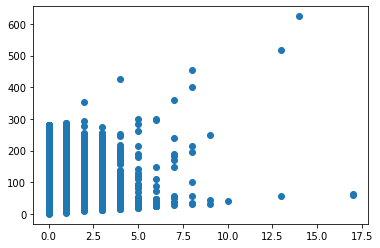

In [10]:
#Remove outliers
AMPDS_df = AMPDS_df[AMPDS_df['Electronics Workbench Energy'] < 20]
plt.scatter(AMPDS_df['Home Office Energy'], AMPDS_df['Total Energy'])
plt.show()

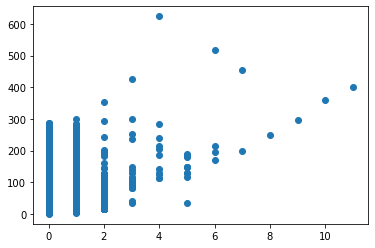

In [11]:
plt.scatter(AMPDS_df['Electronics Workbench Energy'], AMPDS_df['Total Energy'])
plt.show()

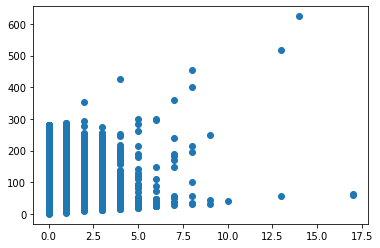

In [12]:
plt.scatter(AMPDS_df['Home Office Energy'], AMPDS_df['Total Energy'])
plt.show()

### RAE dataset
For house 1, we may train a home office consumption vs. Total consumption model 

For house 2, we may train a mobile phone charger vs. Total consumption model 

##### House 1

In [13]:
RAE_house1_df = pd.read_csv('RAE/house1_subs_blk1.csv')
RAE_house1_df =  RAE_house1_df.loc[:,['unix_ts', 'sub' ,'Pt']]


In [14]:
house1_total_energy = RAE_house1_df.groupby(['unix_ts'])['Pt'].sum()
house1_total_energy

unix_ts
1454832000      2078
1454832001      2078
1454832002      2079
1454832003      2079
1454832004      2079
               ...  
1455609595    293927
1455609596    293927
1455609597    293927
1455609598    293927
1455609599    293927
Name: Pt, Length: 777600, dtype: int64

In [15]:
RAE_house1_df = RAE_house1_df[RAE_house1_df['sub'] == 24] 
#RAE_house1_df

In [16]:
RAE_house1_df['Total Energy'] = list(house1_total_energy)
RAE_house1_df.rename(columns = {'unix_ts': 'TS', 'Pt': 'Home Office Energy'}, inplace = True)
RAE_house1_df.set_index('TS', inplace=True)
RAE_house1_df.drop('sub', axis='columns', inplace=True)
RAE_house1_df

,Home Office Energy,Total Energy
TS,,
1454832000,294,2078
1454832001,294,2078
1454832002,294,2079
1454832003,294,2079
1454832004,294,2079
...,...,...
1455609595,37091,293927
1455609596,37091,293927
1455609597,37091,293927


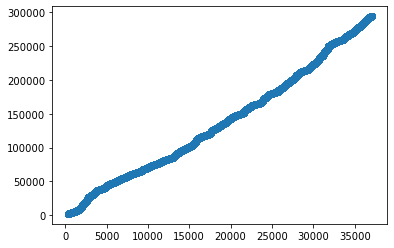

In [17]:
plt.scatter(RAE_house1_df['Home Office Energy'], RAE_house1_df['Total Energy'])
plt.show()

##### House 2

In [18]:
chunks = []
chunksize = 10 ** 6
for chunk in pd.read_csv('RAE/house2_subs_blk1.csv', chunksize=chunksize):
    chunks.append(chunk)

In [19]:
RAE_house2_df = pd.concat(chunks[:8], ignore_index=True)

In [20]:
RAE_house2_df =  RAE_house2_df.loc[:,['unix_ts', 'sub' ,'Pt']]

In [21]:
house2_total_energy = RAE_house2_df.groupby(['unix_ts'])['Pt'].sum()

In [22]:
house2_total_energy = house2_total_energy.rename('Total Energy')
house2_total_energy

unix_ts
1505286000     35298
1505286001     35298
1505286002     35299
1505286003     35299
1505286004     35299
               ...  
1505730210    100509
1505730211    100509
1505730212    100509
1505730213    100509
1505730214     71276
Name: Total Energy, Length: 380953, dtype: int64

In [23]:
RAE_house2_df = RAE_house2_df[RAE_house2_df['sub'] == 21]
RAE_house2_df.set_index('unix_ts', inplace = True)
RAE_house2_df.rename(columns = {'Pt': 'Mobile Phone Charger Energy'}, inplace = True)
RAE_house2_df

,sub,Mobile Phone Charger Energy
unix_ts,,
1505286000,21,18
1505286001,21,18
1505286002,21,18
1505286003,21,18
1505286004,21,18
...,...,...
1505730209,21,67
1505730210,21,67
1505730211,21,67


In [24]:
RAE_house2_df = RAE_house2_df.join(house2_total_energy).drop(['sub'], axis=1)
RAE_house2_df

,Mobile Phone Charger Energy,Total Energy
unix_ts,,
1505286000,18,35298
1505286001,18,35298
1505286002,18,35299
1505286003,18,35299
1505286004,18,35299
...,...,...
1505730209,67,100509
1505730210,67,100509
1505730211,67,100509


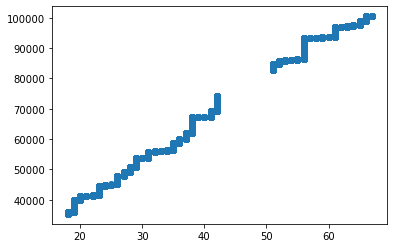

In [25]:
plt.scatter(RAE_house2_df['Mobile Phone Charger Energy'], RAE_house2_df['Total Energy'])
plt.show()

### HUE dataset